In [64]:
from IPython.display import Image, display

# Model Concepts

### A. Feature Map & Filter

* **Filter**: One *Convolution* on a *Receptive Field* with pre-defined shaped (e.g. 2x2 window on a 2D pixel matrix).
* **Feature Map**: The mth neural layer generated by running filters across the m-1th neural layer.
* **Dimensionality**: Conventionally, a weight tensor in CNN is represented with four 4D:
    * Number of Feature Maps at layer m
    * Number of Feature Mpas at layer m-1
    * Filter Height
    * Filter Width

In [ ]:
# E.G.
#  W      =       (2,         3,            9,       9)
#                  ^          ^             ^        ^
#                  |          |             |        |
#              numFmap_m  numFamp_m-1     flt_ht   flt_wd
#                         e.g. rgb image

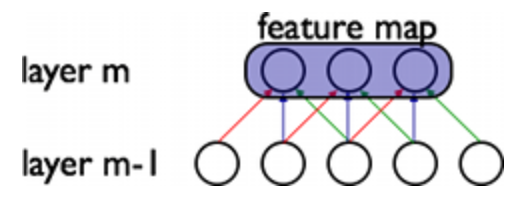

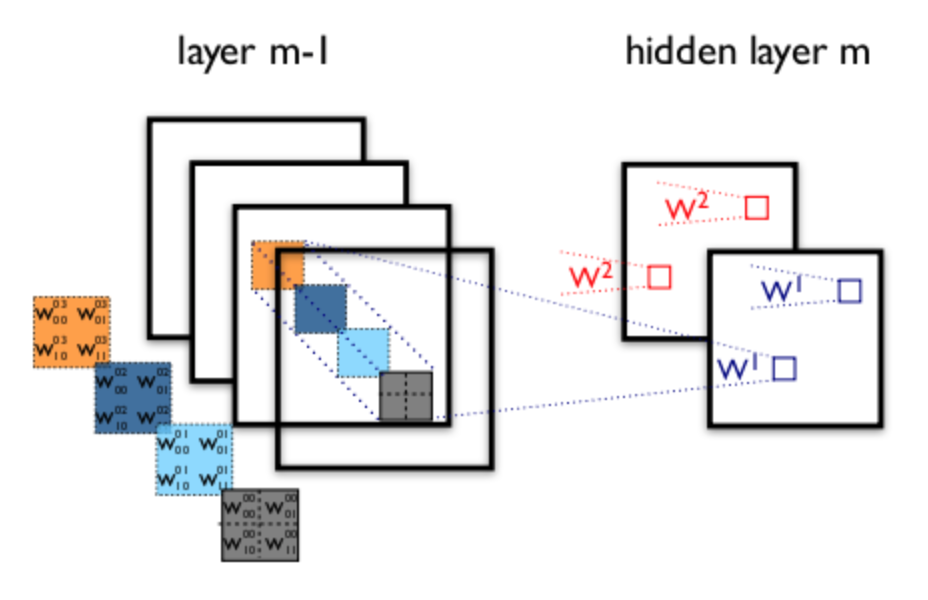

Figure: # of Input Fmaps = 4; # of Output Fmaps = 2; Filter Height = 2; Fliter Width = 2.
In Implementation: W.shape = (#InputFmap, #OutputFmap, FltHt, FltWt), or (#OutputFmap, #InputFmap, FltHt, FltWt)


In [72]:
display(Image(filename="/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/ML_GENERAL/PYTHON_IMPL/DATA/feature_map_and_filter_micro.png", width="30%"))
display(Image(filename="/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/ML_GENERAL/PYTHON_IMPL/DATA/feature_map_and_filter_macro.png", width="40%"))
print "Figure: # of Input Fmaps = 4; # of Output Fmaps = 2; Filter Height = 2; Fliter Width = 2."
print "In Implementation: W.shape = (#InputFmap, #OutputFmap, FltHt, FltWt), or (#OutputFmap, #InputFmap, FltHt, FltWt)"

### B. Convolution Abstraction (w/ E.G.)

In [7]:
import numpy as np

In [73]:
import theano
import theano.tensor as T
from theano import shared, function
from theano.tensor import tanh
from theano.tensor.nnet import conv2d, sigmoid

In [34]:
rng = np.random.RandomState(0)
inpt = T.tensor4(name='inpt')
WShape = (2,3,9,9)
WBound = np.sqrt(3*9*9) # for weight initialization (cf. Xavier10)
W = shared(np.asarray(rng.uniform(low=-1./WBound,high=1./WBound,size=WShape),
                      dtype=inpt.dtype),
           name='W')
bShape = (2,)
b = shared(np.asarray(rng.uniform(low=-.5,high=.5,size=bShape),
                      dtype=inpt.dtype),
           name='b')
convOut = conv2d(inpt, W) # symbolic expression that computes the convolution of input with filters in W.
output = sigmoid(convOut + b.dimshuffle('x',0,'x','x')) # reshape b for computation.
f = function([inpt], output)

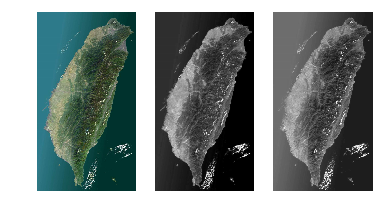

In [63]:
import pylab
import PIL.Image as pimg
%matplotlib inline
img = pimg.open("/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/ML_GENERAL/PYTHON_IMPL/DATA/taiwan.png")
img = np.asarray(img, dtype='float64') / 256 # dimension: height, width, channel=3 (i.e. rgb)
    # img.shape = (1272, 700, 3)
imgTransform = img.transpose(2,0,1).reshape(1,3,1272,700)
imgFiltered = f(imgTransform) # turn rgb 3D image into some 2D.
pylab.subplot(1,3,1); pylab.axis('off'); pylab.imshow(img); pylab.gray()
pylab.subplot(1,3,2); pylab.axis('off'); pylab.imshow(imgFiltered[0,0,:,:])
pylab.subplot(1,3,3); pylab.axis('off'); pylab.imshow(imgFiltered[0,1,:,:])

### C. MaxPooling

In [56]:
from theano.tensor.signal import downsample

In [61]:
inpt = T.dtensor4('inpt')
maxpoolShape = (2,2)
poolOut = downsample.max_pool_2d(inpt, maxpoolShape, ignore_border=True)
    # ignore_border: if True, ignore border pixels (e.g. 5x5 -> 2x2); 
    #  otherwise include border pixels (e.g. 5x5 -> 3x3).
f = function([inpt], poolOut) # we maxpool on height & width.
invals = np.random.RandomState(0).rand(3,2,5,5)
print "ignore_border=True: "
print "invals[0,0,:,:]=\n", invals[0,0,:,:]
print "output[0,0,:,:]=\n", f(invals)[0,0,:,:]
poolOut = downsample.max_pool_2d(inpt, maxpoolShape, ignore_border=False)
f = function([inpt],poolOut)
print "ignore_border=False"
print "invals[0,0,:,:]=\n", invals[1,0,:,:]
print "output[0,0,:,:]=\n", f(invals)[1,0,:,:]

ignore_border=True: 
invals[0,0,:,:]=
[[ 0.5488135   0.71518937  0.60276338  0.54488318  0.4236548 ]
 [ 0.64589411  0.43758721  0.891773    0.96366276  0.38344152]
 [ 0.79172504  0.52889492  0.56804456  0.92559664  0.07103606]
 [ 0.0871293   0.0202184   0.83261985  0.77815675  0.87001215]
 [ 0.97861834  0.79915856  0.46147936  0.78052918  0.11827443]]
output[0,0,:,:]=
[[ 0.71518937  0.96366276]
 [ 0.79172504  0.92559664]]
ignore_border=False
invals[0,0,:,:]=
[[ 0.57019677  0.43860151  0.98837384  0.10204481  0.20887676]
 [ 0.16130952  0.65310833  0.2532916   0.46631077  0.24442559]
 [ 0.15896958  0.11037514  0.65632959  0.13818295  0.19658236]
 [ 0.36872517  0.82099323  0.09710128  0.83794491  0.09609841]
 [ 0.97645947  0.4686512   0.97676109  0.60484552  0.73926358]]
output[0,0,:,:]=
[[ 0.65310833  0.98837384  0.24442559]
 [ 0.82099323  0.83794491  0.19658236]
 [ 0.97645947  0.97676109  0.73926358]]


### D. Typical Architecture

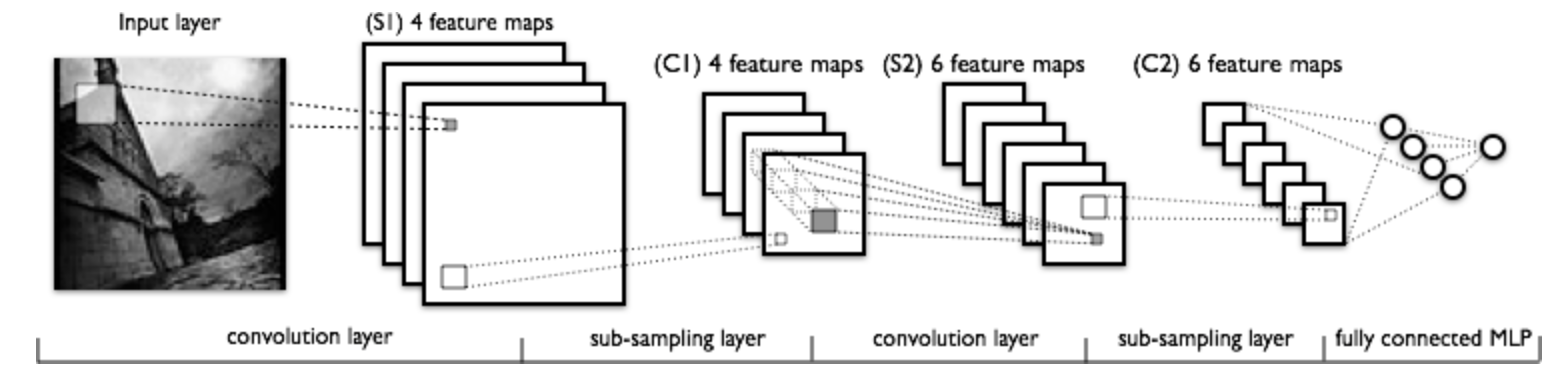

In [68]:
display(Image(filename="/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/ML_GENERAL/PYTHON_IMPL/DATA/typical_cnn.png", width="90%"))

# Model Code

In [100]:
import sys, os, timeit
# sys.path.append("/Users/jacobsw/Desktop/IMPLEMENTATION_CAMP/CODE/BASIC_TOPICS/ML_GENERAL/PYTHON_IMPL/ACCESSORIES")
from accessories import HiddenLayer, OutputLayer, shared_dataset, load_mnist

In [93]:
class ConvPoolLayer:
    
    def __init__(self, rng, inpt, filterShape, imageShape, poolSize=(2,2)):
        # inpt: T.dtensor4, symbolic image tensor, shape=imageShape.
        # filterShape: tuple (len=4), (# filters (i.e. output feature maps), # input feature maps, 
        #                              filter height, filter width).
        # imageShape: tuple (len=4), (batchSize, # input feature maps, image height, image width).
        # poolSize: downsample size (# rows, # cols).
        assert imageShape[1]==filterShape[1]
        self.inpt = inpt
        fanIn = np.prod(filterShape[1:]) 
            # number of input unit for each hidden unit = # input feature maps * filter height * filter width.
        fanOut = (filterShape[0]*np.prod(filterShape[2:])) / np.prod(poolSize)
            # number of output unit = # (output feature maps * filter height * filter width) / pooling size.
        WBound = np.sqrt(6./(fanIn+fanOut)) # weight initialization technique (cf. Xavier10).
        self.W = shared(np.asarray(rng.uniform(low=-WBound,high=WBound,size=filterShape),
                                   dtype=theano.config.floatX),
                        borrow=True)
        bVals = np.zeros((filterShape[0],), dtype=theano.config.floatX)
        self.b = shared(value=bVals, borrow=True)
        convOut = conv2d(input=inpt, filters=self.W, filter_shape=filterShape, input_shape=imageShape)
        pooledOut = downsample.max_pool_2d(input=convOut, ds=poolSize, ignore_border=True)
        self.output = tanh(pooledOut + self.b.dimshuffle('x',0,'x','x'))
        self.params = [self.W, self.b]
        

In [104]:
def sgd_convpool(lr=.01, epochs=200, data=load_mnist, batchSize=500, nkerns=[20,50], poolSize=(2,2)):
    # nkerns: number of kernels on each layer (i.e. # of feature maps, in or out, depending on use).
    
    datasets = load_mnist()
    X_train, Y_train = datasets[0]
    X_dev, Y_dev = datasets[1]
    X_test, Y_test = datasets[2]    
    
    nTrainBatches = X_train.get_value(borrow=True).shape[0] / batchSize 
    nDevBatches = X_dev.get_value(borrow=True).shape[0] / batchSize
    nTestBatches = X_test.get_value(borrow=True).shape[0] / batchSize

    print "... building the model"

    index = T.iscalar()
    x = T.matrix('x')
    y = T.ivector('y')
    
    rng = np.random.RandomState(0)
    
    layer0Input = x.reshape((batchSize, 1, 28, 28))
    layer0 = ConvPoolLayer(rng, inpt=layer0Input, imageShape=(batchSize, 1, 28, 28), 
                                                  filterShape=(nkerns[0], 1, 5, 5), 
                                                  poolSize=poolSize)
        # filtering (5x5 filter): (28-5+1,28-5+1) = (24,24)
        # pooling (2x2 pool): (24/2,24/2) = (12, 12)
        # batch abstraction: 500/batch in, 20/batch out.
    layer1 = ConvPoolLayer(rng, inpt=layer0.output, imageShape=(batchSize, nkerns[0], 12, 12), 
                                                    filterShape=(nkerns[1], nkerns[0], 5, 5), 
                                                    poolSize=poolSize)
        # filtering (5x5 filter): (12-5+1,12-5+1) = (8,8)
        # pooling (2x2 pool): (8/2,8/2) = (4,4)
        # batch abstraction: 500/batch in, 50/batch out.
    layer2Input = layer1.output.flatten(2)
    layer2 = HiddenLayer(rng, inpt=layer2Input, nIn=nkerns[1]*4*4, nOut=500, activation=tanh)
    layer3 = OutputLayer(inpt=layer2.output, nIn=500, nOut=10)
    cost = layer3.nll(y)
    
    test_model = function(inputs=[index], outputs=layer3.errors(y),
                          givens = {x: X_test[index*batchSize: (index+1)*batchSize],
                                    y: Y_test[index*batchSize: (index+1)*batchSize]})
    dev_model = function(inputs=[index], outputs=layer3.errors(y),
                         givens = {x: X_dev[index*batchSize: (index+1)*batchSize],
                                   y: Y_dev[index*batchSize: (index+1)*batchSize]})  
    
    params = layer3.params + layer2.params + layer1.params + layer0.params
    grads = T.grad(cost, params)
    updates = [(param, param-lr*grad) for param,grad in zip(params, grads)]
    
    train_model = function(inputs=[index], outputs=cost, updates=updates, 
                           givens = {x: X_train[index*batchSize: (index+1)*batchSize],
                                     y: Y_train[index*batchSize: (index+1)*batchSize]})
    
    print "... training the model"
    
    patience = 10000
    patienceIncrease = 2
    improvementThreshold = .995
    validationFrequency = min(nTrainBatches, patience/2)
    bestValidationLoss = np.inf
    bestIter = 0
    testScore = 0.
    startTime = timeit.default_timer()
    
    epoch = 0
    doneLooping = False
    
    while (epoch < epochs) and (not doneLooping):
        epoch += 1
        for batchIndex in range(nTrainBatches):
            iter = (epoch-1)*nTrainBatches + batchIndex
            if iter % 100 == 0: print "training @ iter = ", iter            
            cost_ij = train_model(batchIndex)
            
            if (iter+1) % validationFrequency == 0:
                validationLosses = [dev_model(i) for i in range(nDevBatches)]
                thisValidationLoss = np.mean(validationLosses)
                print "Epoch %i, Batch %i/%i, Validation Error %f %%" % (epoch,batchIndex+1,
                                                                         nTrainBatches,thisValidationLoss*100.)
                if thisValidationLoss < bestValidationLoss:
                    if thisValidationLoss < bestValidationLoss*improvementThreshold:
                        patience = max(patience, iter*patienceIncrease)
                        bestValidationLoss = thisValidationLoss
                        bestIter = iter
                        testLosses = [test_model(i) for i in range(nTestBatches)]
                        testScore = np.mean(testLosses)
                        print "Epoch %i, Batch %i/%i, Test Error of Best: %f %%" % (epoch,batchIndex,
                                                                                    nTrainBatches,testScore*100.)
                if patience <= iter:
                    doneLooping = True
                    break
    endTime = timeit.default_timer()
    print "Optimization Done, Best Validation Score: %f %% (at iter %i, best test performance %f %%)" % (bestValidationLoss*100,
                                                                                                         bestIter+1,
                                                                                                         testScore*100.)
    print "Run Time: %f" % (endTime-startTime)
    

In [105]:
sgd_convpool()

... building the model
... training the model
training @ iter =  0
Epoch 1, Batch 100/100, Validation Error 25.610000 %
Epoch 1, Batch 99/100, Test Error of Best: 25.240000 %
training @ iter =  100
Epoch 2, Batch 100/100, Validation Error 22.000000 %
Epoch 2, Batch 99/100, Test Error of Best: 22.070000 %
training @ iter =  200
Epoch 3, Batch 100/100, Validation Error 15.750000 %
Epoch 3, Batch 99/100, Test Error of Best: 16.200000 %
training @ iter =  300
Epoch 4, Batch 100/100, Validation Error 12.600000 %
Epoch 4, Batch 99/100, Test Error of Best: 13.250000 %
training @ iter =  400
Epoch 5, Batch 100/100, Validation Error 11.110000 %
Epoch 5, Batch 99/100, Test Error of Best: 11.490000 %
training @ iter =  500
Epoch 6, Batch 100/100, Validation Error 10.230000 %
Epoch 6, Batch 99/100, Test Error of Best: 10.560000 %
training @ iter =  600
Epoch 7, Batch 100/100, Validation Error 9.520000 %
Epoch 7, Batch 99/100, Test Error of Best: 9.750000 %
training @ iter =  700
Epoch 8, Batch 100